In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [74]:
def show(name,n,m,i,Title):
    plt.subplot(n,m,i)
    plt.imshow(name,cmap='grey')
    plt.title(Title)
    plt.axis('off')

In [75]:
def capture_img(c_index=0):
    # c_index == camera index
    cap = cv2.VideoCapture(c_index)
    if not cap.isOpened():
        print(f"Camera index {c_index} not found. Trying another index...")
        cap = cv2.VideoCapture(1)  # Try second camera index
        if not cap.isOpened():
            print("No camera found!")
            return None

    ret, frame = cap.read()  # Capture a single frame
    cap.release()

    if not ret:
        print("Failed to capture image.")
        return None

    return frame


In [76]:
#a. Grey scale
def greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [77]:
#b. Threshloding Images
def threshold_image_i(image, threshold_value=127):
    _, holded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return holded

In [78]:
def threshold_image_ii(image):
    n = 256//8
    t_image = (image//n)*n
    return t_image

In [79]:
#c. Sobel and Canny

def sobel_edge_detection(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal gradients
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical gradients
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combine both gradients
    sobel_combined = np.uint8(sobel_combined)  # Convert to uint8 for display
    return sobel_combined

def canny_edge_detection(image, lower_thresh=50, upper_thresh=150):
    edges = cv2.Canny(image, lower_thresh, upper_thresh)
    return edges

In [80]:
#d. Applying Gaussian Filter
def gaussian_filter(image, kernel_size=5, sigma=2):
    kernel_half = kernel_size // 2
    x, y = np.mgrid[-kernel_half:kernel_half+1, -kernel_half:kernel_half+1]
    gaussian_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_kernel /= gaussian_kernel.sum()

    gaussian_image = cv2.filter2D(image, -1, gaussian_kernel)
    return gaussian_image


In [81]:
#e. Sharpen image
def sharpen_convolution(image,kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding size (assumes kernel is square and odd-sized)
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros (zero-padding)
    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width), dtype=np.float32)
    padded_image[pad_height:pad_height+image_height, pad_width:pad_width+image_width] = image

    # Initialize the output (result) image
    result = np.zeros_like(image, dtype=np.float32)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Element-wise multiplication and summing
            result[i, j] = np.sum(region * kernel)

    # Clip values to be in the range [0, 255] and convert to uint8
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

In [82]:
def sharpen_image(image):
    kernel = np.array([[ 0, -1,  0],[-1,  5, -1],[ 0, -1,  0]], dtype=np.float32)
    return sharpen_convolution(image, kernel)


In [83]:
#f. RGB to BGR
def rgb_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


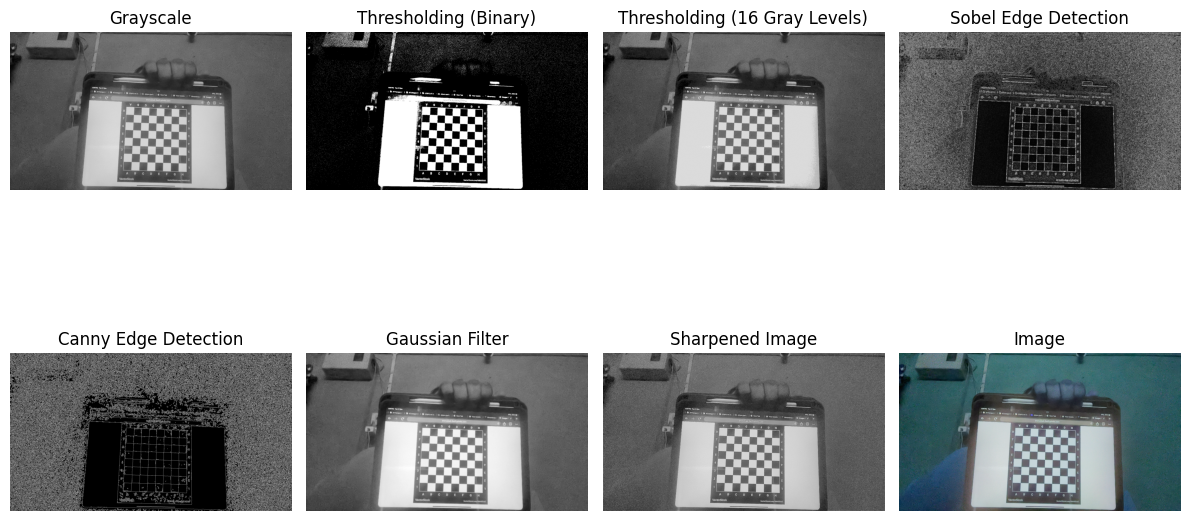

In [85]:
def main():
    image = capture_img(0)

    # Step 2: Apply the transformations
    grey_image = greyscale(image)
    thresholded_image_i = threshold_image_i(grey_image)
    thresholded_image_ii = threshold_image_ii(grey_image)
    sobel_image = sobel_edge_detection(grey_image)
    canny_image = canny_edge_detection(grey_image)
    gaussian_image = gaussian_filter(grey_image)
    sharpened_image = sharpen_image(grey_image)
    # rgb_image = rgb_to_bgr(grey_image)

    # Step 3: Display the images in a 2x4 grid using the 'show' function
    plt.figure(figsize=(12, 8))  # Set figure size

    # Show the images in a 2x4 grid
    show(grey_image, 2, 4, 1, "Grayscale")
    show(thresholded_image_i, 2, 4, 2, "Thresholding (Binary)")
    show(thresholded_image_ii, 2, 4, 3, "Thresholding (16 Gray Levels)")
    show(sobel_image, 2, 4, 4, "Sobel Edge Detection")
    show(canny_image, 2, 4, 5, "Canny Edge Detection")
    show(gaussian_image, 2, 4, 6, "Gaussian Filter")
    show(sharpened_image, 2, 4, 7, "Sharpened Image")
    show(image, 2, 4, 8, "Image")

    plt.tight_layout()  # Adjust subplots to fit the figure area
    plt.show()  # Display the plot

# Call the main function to execute the code
if __name__ == "__main__":
    main()